# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 2

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [59]:
# Dataset
clean_data_path = "autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")
df.head(4)#Exibe o DataSet


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5


## Número de veículos pertencentes a cada marca

In [57]:
df.columns #Identificar todas as colunas de dados

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

In [60]:
df.T #Aplicando a transposta da matriz, pois assim é possivel visualizar melhor
     #os dados de cada uma das colunas

,0,1,2,3,4,5,6,7,8,9,...,313677,313678,313679,313680,313681,313682,313683,313684,313685,313686
dateCrawled,2016-03-24 11:52:17,2016-03-23 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04,2016-03-31 17:25:20,2016-04-04 17:36:23,2016-04-01 20:48:51,2016-03-21 18:54:38,2016-03-17 10:53:50,2016-03-26 19:54:18,...,2016-04-04 09:57:12,2016-03-28 13:48:07,2016-04-02 20:37:03,2016-03-19 19:53:49,2016-03-27 20:36:20,2016-03-21 09:50:58,2016-03-14 17:48:27,2016-03-05 19:56:21,2016-03-19 18:57:12,2016-03-20 19:41:08
name,Golf_3_1.6,A5_Sportback_2.7_Tdi,"Jeep_Grand_Cherokee_""Overland""",GOLF_4_1_4__3TÃRER,Skoda_Fabia_1.4_TDI_PD_Classic,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,Peugeot_206_CC_110_Platinum,VW_Derby_Bj_80__Scheunenfund,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,Mazda_3_1.6_Sport,...,Volkswagen_Lupo_1.0,Volkswagen_Golf_2.0_TDI_DPF_Team,Bmw_320_D_DPF_Touring_!!!,turbo_defekt,Opel_Zafira_1.6_Elegance_TÃV_12/16,Mitsubishi_Cold,Suche_t4___vito_ab_6_sitze,Smart_smart_leistungssteigerung_100ps,Volkswagen_Multivan_T4_TDI_7DC_UY2,VW_Golf_Kombi_1_9l_TDI
seller,privat,privat,privat,privat,privat,privat,privat,privat,privat,privat,...,privat,privat,privat,privat,privat,privat,privat,privat,privat,privat
offerType,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,...,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer,Offer
price,480,18300,9800,1500,3600,650,2200,0,999,2000,...,1490,7900,3999,3200,1150,0,2200,1199,9200,3400
abtest,test,test,test,test,test,test,test,test,test,control,...,control,test,test,control,control,control,test,test,test,test
vehicleType,Other,coupe,suv,kleinwagen,kleinwagen,limousine,cabrio,limousine,kleinwagen,limousine,...,kleinwagen,limousine,kombi,limousine,bus,Other,Other,cabrio,bus,kombi
yearOfRegistration,1993,2011,2004,2001,2008,1995,2004,1980,1998,2004,...,1998,2010,2005,2004,2000,2005,2005,2000,1996,2002
gearbox,manuell,manuell,automatik,manuell,manuell,manuell,manuell,manuell,manuell,manuell,...,manuell,manuell,manuell,manuell,manuell,manuell,Unspecified,automatik,manuell,manuell
powerPS,0,190,163,75,69,102,109,50,101,105,...,50,140,3,225,0,0,0,101,102,100


## Número de veículos pertencentes a cada marca

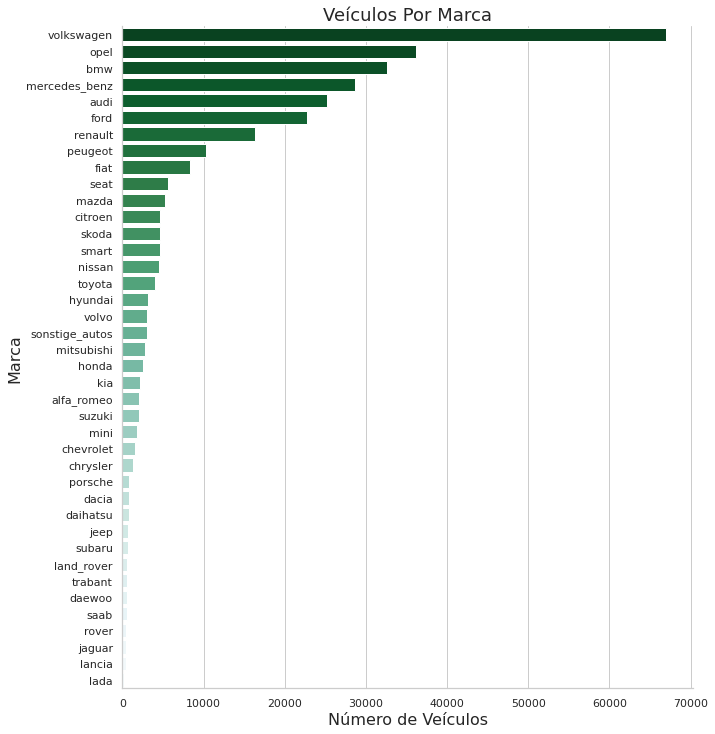

In [73]:
#Na sequencia da maior quantidade de veiculos para o menor
sns.set_style("whitegrid")
Car = sns.catplot(y="brand", data=df, kind="count", palette="BuGn_r", height=10, aspect=1,order=df['brand'].value_counts().index)
Car.ax.set_title("Veículos Por Marca",fontdict={'size':18})
Car.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
Car.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()


In [74]:
# Salvando o plot
Car.savefig(("plots/Analise2/Veiclos_por_marca.png"))

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

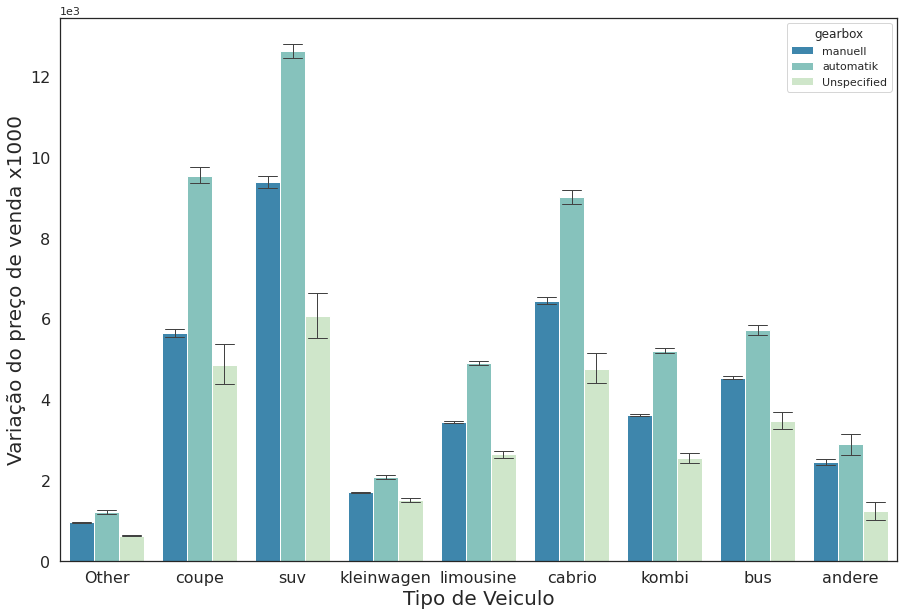

In [97]:
gear, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='vehicleType', y='price', hue='gearbox', data=df,palette='GnBu_r',errwidth=1,capsize=.2 )
sns.set_style('white')
ax.xaxis.set_label_text('Tipo de Veiculo',fontdict= {'size':20})
ax.yaxis.set_label_text('Variação do preço de venda x1000',fontdict= {'size':20})
ax.ticklabel_format(axis='y',style='sci', scilimits=(3,3))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

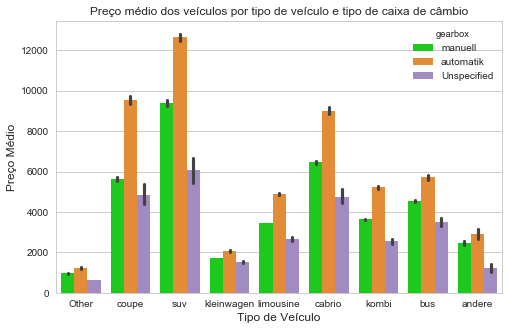

In [5]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio


In [6]:
# Salvando o plot
geear.savefig("plots/Analise2/vehicletype-gearbox-price.png")

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>